# PREDICTING OUT-MIGRATION DESTINATION OF MILLENNIALS FROM NEW JERSEY

### 1. Extract the 'Population Density and Non-Driving Commuting in Counties That Disproportionately Attract New Jersey Millennials' table from njfuture.org website

In [1]:
# import the necessary library to parse the table from html website
from bs4 import BeautifulSoup
import requests

In [2]:
# set up requests for the url
url = requests.get("https://www.njfuture.org/2019/04/22/are-millennials-leaving-new-jersey-because-housing-costs-too-much/").text

In [3]:
soup = BeautifulSoup(url, 'lxml')

In [4]:
print(soup.prettify()) # print the whole website html

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
 <!-- hm -->
 <head profile="http://gmpg.org/xfn/11">
  <title>
   Are Millennials Leaving NJ Because of Housing Costs? | New Jersey Future
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="https://www.njfuture.org/wp-content/themes/njf/style.css" media="screen" rel="stylesheet" type="text/css"/>
  <link href="https://www.njfuture.org/xmlrpc.php" rel="pingback"/>
  <link href="https://www.njfuture.org/wp-content/themes/njf/favicon.ico" rel="shortcut icon"/>
  <!--[if lt IE 8]>
		<link rel="stylesheet" href="https://www.njfuture.org/wp-content/themes/njf/ie7.css" />
	<![endif]-->
  <!-- All in One SEO Pack 3.2.5 by Michael Torbert of Semper Fi Web Design[232,332] -->
  <meta content="A look at the places with the characteristics that attract Millennials, but that ar

In [5]:
all_tables = soup.find_all('table')
all_tables

[<table border="0"><tr><td><div id="fb-root"></div><script src="https://connect.facebook.net/en_US/all.js#appId=238404432851060&amp;xfbml=1"></script><fb:like action="recommend" font="" href="" layout="button_count" send="false" show_faces="true" width="100"></fb:like></td><td><a class="twitter-share-button" data-count="horizontal" data-via="newjerseyfuture" href="http://twitter.com/share">Tweet</a><script src="//platform.twitter.com/widgets.js" type="text/javascript"></script></td><td><script src="https://apis.google.com/js/plusone.js" type="text/javascript"></script><g:plusone size="medium"></g:plusone></td><td><script src="https://platform.linkedin.com/in.js" type="text/javascript"></script><script data-counter="right" type="IN/Share"></script></td></tr></table>,
 <table class="tablepress tablepress-id-3" id="tablepress-3">
 <thead>
 <tr class="row-1">
 <th class="column-1">Destination County</th><th class="column-2">Major City in County</th><th class="column-3">All In-migrants From

In [6]:
# find the required table from the website html
My_table = soup.find('table', {'class':'tablepress tablepress-id-3'})
My_table

<table class="tablepress tablepress-id-3" id="tablepress-3">
<thead>
<tr class="row-1">
<th class="column-1">Destination County</th><th class="column-2">Major City in County</th><th class="column-3">All In-migrants From NJ Age 20 or older</th><th class="column-4">Millennial in-migrants from NJ</th><th class="column-5">Millennials as % of all adult in-migrants from NJ</th><th class="column-6">population density (people per sq. mi., 2017)</th><th class="column-7">% commuting by walking, biking, or public transit</th>
</tr>
</thead>
<tbody class="row-hover">
<tr class="row-2">
<td class="column-1">New York County, NY</td><td class="column-2">(Manhattan)</td><td class="column-3">19,174</td><td class="column-4">12,694</td><td class="column-5">66.2%</td><td class="column-6">73,478</td><td class="column-7">87.74%</td>
</tr>
<tr class="row-3">
<td class="column-1">Philadelphia County, PA</td><td class="column-2">Philadelphia</td><td class="column-3">11,445</td><td class="column-4">7,819</td><t

In [8]:
# to check the type and making sure we parse the table successfully
type(My_table)

bs4.element.Tag

In [9]:
# import the required libraries to parse the table into dataframe
import pandas as pd
import numpy as np

# defining the table rows
table_rows = My_table.find_all('tr')

# create columns for the table
column = []

for col in My_table.find_all('th'): # find the column from the table head 'th'
    column.append(col.text.strip()) # the text.strip() is used to parse the required text from the html
    
# create the table body(rows)
data = []
for tr in table_rows:
    td = tr.find_all('td') # finding the table content for each column from the 'td'
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        data.append(row)

#
df = pd.DataFrame(data, columns=column)
df.head()

,Destination County,Major City in County,All In-migrants From NJ Age 20 or older,Millennial in-migrants from NJ,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit"
0,"New York County, NY",(Manhattan),"19,174","12,694",66.2%,"73,478",87.74%
1,"Philadelphia County, PA",Philadelphia,"11,445","7,819",68.3%,"11,787",37.28%
2,"Kings County, NY",(Brooklyn),"6,207","3,994",64.3%,"37,940",75.20%
3,"Queens County, NY",(Queens),"6,206","3,375",54.4%,"21,685",59.77%
4,"New Castle County, DE",Wilmington,"4,838","2,503",51.7%,"1,313",7.09%


In [10]:
# remove 'bracket' from the content of 'Major City in County' column
df['Major City in County'] =  df['Major City in County'].apply(lambda x: x.replace('(','').replace(')','')) 

# remove '%' from the content of 'Millennials as % of all adult in-migrants from NJ' column
df['Millennials as % of all adult in-migrants from NJ'] = df['Millennials as % of all adult in-migrants from NJ'].apply(lambda x: x.replace('%', ''))

# remove '%' from the content of '% commuting by walking, biking, or public transit' column
df['% commuting by walking, biking, or public transit'] = df['% commuting by walking, biking, or public transit'].apply(lambda x: x.replace('%', ''))

#convert the 'Major City in County' column into a string
df['Major City in County'] = df['Major City in County'].astype(str)


df.head(10)

,Destination County,Major City in County,All In-migrants From NJ Age 20 or older,Millennial in-migrants from NJ,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit"
0,"New York County, NY",Manhattan,"19,174","12,694",66.2,"73,478",87.74
1,"Philadelphia County, PA",Philadelphia,"11,445","7,819",68.3,"11,787",37.28
2,"Kings County, NY",Brooklyn,"6,207","3,994",64.3,"37,940",75.20
3,"Queens County, NY",Queens,"6,206","3,375",54.4,"21,685",59.77
4,"New Castle County, DE",Wilmington,"4,838","2,503",51.7,"1,313",7.09
5,"Montgomery County, PA",Norristown,"3,412","1,752",51.3,"1,710",8.81
6,"Bronx County, NY",Bronx,"3,435","1,742",50.7,"34,956",70.35
7,"Orange County, FL",Orlando,"3,130","1,584",50.6,"1,493",4.71
8,"Suffolk County, MA",Boston,"2,056","1,449",70.5,"13,697",49.36
9,"District of Columbia, DC",Washington,"1,513","1,281",84.7,"11,350",57.33


In [11]:
# split the 'County' and 'State' into 2 different columns
new = df['Destination County'].str.split(',', n =1, expand = True)
df.drop(columns = ['Destination County'], inplace = True) # drop the existing column

df['Destination County'] = new[0] # rename the 'County' column
df['State'] = new[1] # rename the 'State' column

df.head(10) # show the first 10 rows

,Major City in County,All In-migrants From NJ Age 20 or older,Millennial in-migrants from NJ,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit",Destination County,State
0,Manhattan,"19,174","12,694",66.2,"73,478",87.74,New York County,NY
1,Philadelphia,"11,445","7,819",68.3,"11,787",37.28,Philadelphia County,PA
2,Brooklyn,"6,207","3,994",64.3,"37,940",75.20,Kings County,NY
3,Queens,"6,206","3,375",54.4,"21,685",59.77,Queens County,NY
4,Wilmington,"4,838","2,503",51.7,"1,313",7.09,New Castle County,DE
5,Norristown,"3,412","1,752",51.3,"1,710",8.81,Montgomery County,PA
6,Bronx,"3,435","1,742",50.7,"34,956",70.35,Bronx County,NY
7,Orlando,"3,130","1,584",50.6,"1,493",4.71,Orange County,FL
8,Boston,"2,056","1,449",70.5,"13,697",49.36,Suffolk County,MA
9,Washington,"1,513","1,281",84.7,"11,350",57.33,District of Columbia,DC


In [12]:
# move the State column into the first column
fixed_columns = [df.columns[-1]] + list(df.columns[:-1])
df = df[fixed_columns]

# move the Destination county column into the first column
fixed_columns = [df.columns[-1]] + list(df.columns[:-1])
df = df[fixed_columns]

df.head()

,Destination County,State,Major City in County,All In-migrants From NJ Age 20 or older,Millennial in-migrants from NJ,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit"
0,New York County,NY,Manhattan,"19,174","12,694",66.2,"73,478",87.74
1,Philadelphia County,PA,Philadelphia,"11,445","7,819",68.3,"11,787",37.28
2,Kings County,NY,Brooklyn,"6,207","3,994",64.3,"37,940",75.20
3,Queens County,NY,Queens,"6,206","3,375",54.4,"21,685",59.77
4,New Castle County,DE,Wilmington,"4,838","2,503",51.7,"1,313",7.09


### 2. Exploratory Data Analysis and Data Cleaning

In [13]:
# inspect the types of all columns
df.dtypes

Destination County                                   object
State                                                object
Major City in County                                 object
All In-migrants From NJ Age 20 or older              object
Millennial in-migrants from NJ                       object
Millennials as % of all adult in-migrants from NJ    object
population density (people per sq. mi., 2017)        object
% commuting by walking, biking, or public transit    object
dtype: object

### We need to change the type of some of the variables into float or integer for analysis but first we need to prepare the data 

In [14]:
# remove the ',' from the data
df['All In-migrants From NJ Age 20 or older'] = df['All In-migrants From NJ Age 20 or older'].apply(lambda x: x.replace(',',''))
df['Millennial in-migrants from NJ'] = df['Millennial in-migrants from NJ'].apply(lambda x: x.replace(',',''))
df['population density (people per sq. mi., 2017)'] = df['population density (people per sq. mi., 2017)'].apply(lambda x: x.replace(',',''))

df.head()

,Destination County,State,Major City in County,All In-migrants From NJ Age 20 or older,Millennial in-migrants from NJ,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit"
0,New York County,NY,Manhattan,19174,12694,66.2,73478,87.74
1,Philadelphia County,PA,Philadelphia,11445,7819,68.3,11787,37.28
2,Kings County,NY,Brooklyn,6207,3994,64.3,37940,75.20
3,Queens County,NY,Queens,6206,3375,54.4,21685,59.77
4,New Castle County,DE,Wilmington,4838,2503,51.7,1313,7.09


In [15]:
# change 'All In-migrants From NJ Age 20 or older', 'Millennial in-migrants from NJ', 'population density (people per sq. mi., 2017)' into integer type
df[['All In-migrants From NJ Age 20 or older', 'Millennial in-migrants from NJ', 'population density (people per sq. mi., 2017)']] = df[['All In-migrants From NJ Age 20 or older', 'Millennial in-migrants from NJ', 'population density (people per sq. mi., 2017)']].astype(int)

# change 'Millennials as % of all adult in-migrants from NJ', '% commuting by walking, biking, or public transit' into float type
df[['Millennials as % of all adult in-migrants from NJ', '% commuting by walking, biking, or public transit']] = df[['Millennials as % of all adult in-migrants from NJ', '% commuting by walking, biking, or public transit']].astype(float)

# recheck the type
df.dtypes

Destination County                                    object
State                                                 object
Major City in County                                  object
All In-migrants From NJ Age 20 or older                int64
Millennial in-migrants from NJ                         int64
Millennials as % of all adult in-migrants from NJ    float64
population density (people per sq. mi., 2017)          int64
% commuting by walking, biking, or public transit    float64
dtype: object

In [16]:
# explore the data
df.describe()

,All In-migrants From NJ Age 20 or older,Millennial in-migrants from NJ,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit"
count,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1388.414286,855.371429,62.978571,4418.071429,15.440571
std,2804.730990,1828.630811,12.351963,10739.960439,17.848016
min,103.000000,54.000000,49.100000,146.000000,1.890000
25%,234.000000,142.000000,52.375000,499.750000,5.162500
50%,400.000000,259.000000,60.000000,1432.500000,8.575000
75%,1287.750000,807.750000,70.375000,2419.500000,17.782500
max,19174.000000,12694.000000,100.000000,73478.000000,87.740000


In [17]:
# check the correltaion among the variables
df.corr()

,All In-migrants From NJ Age 20 or older,Millennial in-migrants from NJ,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit"
All In-migrants From NJ Age 20 or older,1.000000,0.995121,-0.056254,0.840277,0.702748
Millennial in-migrants from NJ,0.995121,1.000000,0.002451,0.837953,0.698998
Millennials as % of all adult in-migrants from NJ,-0.056254,0.002451,1.000000,-0.010839,0.040088
"population density (people per sq. mi., 2017)",0.840277,0.837953,-0.010839,1.000000,0.869035
"% commuting by walking, biking, or public transit",0.702748,0.698998,0.040088,0.869035,1.000000


In [62]:
# import the necessary libraries to create a plot
import seaborn as sns
import matplotlib.pyplot as plt


(0, 103.32164062341496)

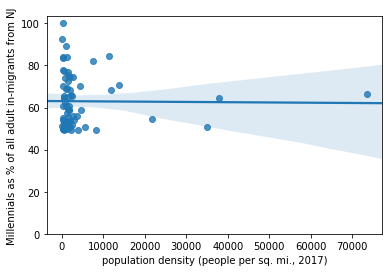

In [63]:
# plot 'Millennials as % of all adult in-migrants from NJ' against 'population density (people per sq. mi., 2017)' using seaborn
sns.regplot(x = 'population density (people per sq. mi., 2017)', y = 'Millennials as % of all adult in-migrants from NJ', data = df)
plt.ylim(0)

(0, 102.65013806764426)

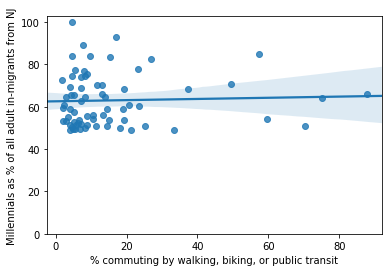

In [19]:
# plot 'Millennials as % of all adult in-migrants from NJ' against '% commuting by walking, biking, or public transit'
sns.regplot(x = '% commuting by walking, biking, or public transit', y = 'Millennials as % of all adult in-migrants from NJ', data = df)
plt.ylim(0)

(0, 77526.82100480686)

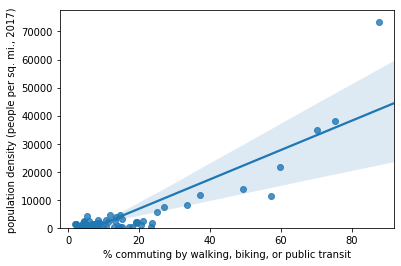

In [20]:
# plot 'population density (people per sq. mi., 2017)' againts '% commuting by walking, biking, or public transit'
sns.regplot(x = '% commuting by walking, biking, or public transit', y = 'population density (people per sq. mi., 2017)', data = df)
plt.ylim(0)

### 3. Plotting Major City of Destination County into a Map

In [21]:
# import the necessary libraries top plot into map
pd.set_option('display.max_columns', None) # setting up to display max column
pd.set_option('display.max_rows', None) # setting up to display max row

import json
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

In [23]:
# getting the coordinate for Major City using geocoder
Latitude = [] # create a empty list of latitude
Longitude = [] # create empty list of longitude
i = 0 

for i in range(len(df['Destination County'])):
    address = '{},{}'.format(df['Major City in County'][i], df['State'][i])
    geolocator = Nominatim(user_agent = 'us_explorer')
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    Latitude.append(latitude)
    Longitude.append(longitude)
    print(df['Major City in County'][i])
    i += 1
    
# insert the latitude and longitude list into the dataframe    
df['Latitude'] = Latitude
df['Longitude'] = Longitude

df.head()

Manhattan
Philadelphia
Brooklyn
Queens
Wilmington
Norristown
Bronx
Orlando
Boston
Washington
Lowell
Chester
Chicago
State College
San Diego
Baltimore
Seattle
Scranton
Providence
New Haven
San Jose
Dundalk
Anaheim
Staten Island
Reading
Bowie
Atlanta
Oakland
Quincy
Rochester
Poughkeepsie
Cleveland
Dunwoody
York
Worcester
Durham
Ithaca
Troy
Harrisburg
Glen Burnie
Richmond
Sanford
Portland
Denver
Columbia
Norfolk
Columbus
Greensboro
Ann Arbor
Carlisle
Minneapolis
Tuckahoe
Nashville
Morgantown
Binghamton
Buffalo
Waukegan
Virginia Beach
Oxnard
Westerly
Wilmington
Pottsville
Burlington
Northampton
Florissant
Kissimmee
Madison
Indianapolis
Salisbury
Champaign


,Destination County,State,Major City in County,All In-migrants From NJ Age 20 or older,Millennial in-migrants from NJ,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit",Latitude,Longitude
0,New York County,NY,Manhattan,19174,12694,66.2,73478,87.74,40.789624,-73.959894
1,Philadelphia County,PA,Philadelphia,11445,7819,68.3,11787,37.28,39.952724,-75.163526
2,Kings County,NY,Brooklyn,6207,3994,64.3,37940,75.20,40.650104,-73.949582
3,Queens County,NY,Queens,6206,3375,54.4,21685,59.77,40.652493,-73.791421
4,New Castle County,DE,Wilmington,4838,2503,51.7,1313,7.09,39.745947,-75.546589


In [24]:
# getting United States coordinate to create a map
address = 'United States'

geolocator = Nominatim(user_agent = 'us_explorer')
location = geolocator.geocode(address)
latititude = location.latitude
longitude = location.longitude

print('Geography coordinate of United States is {}, {}'.format(latitude, longitude))

Geography coordinate of United States is 40.1164205, -100.4458825


In [25]:
# create a US map
map_us = folium.Map(location = [latitude, longitude], zoom_start = 4)

# insert the Major Cities plot into the US map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Major City in County']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius = 5,
                        popup = label,
                        color = 'blue',
                        fill = True,
                        fill_color = '#3186cc',
                        fill_opacity = 0.7,
                        parse_html = False,
                       ).add_to(map_us)
    
map_us # display the US map with the plot

### 4. Clustering Major Destination Cities

In [26]:
# setting up Client ID, Client secret, Version for foursquare.com
CLIENT_ID = 'XQYTD01WFJPCVBX01GCGY5GJWJ5DH05PIPAZEHJFVESOVNR0'
CLIENT_SECRET = 'BI2NPYJKK0FOBFTDDFT0DPFW2YDKEOFEP10J4R1VE5SF4PL5'
VERSION = '20180605'

print('Client_ID: {}, Client_secret: {}, Version: {}'.format(CLIENT_ID, CLIENT_SECRET, VERSION))

Client_ID: XQYTD01WFJPCVBX01GCGY5GJWJ5DH05PIPAZEHJFVESOVNR0, Client_secret: BI2NPYJKK0FOBFTDDFT0DPFW2YDKEOFEP10J4R1VE5SF4PL5, Version: 20180605


In [27]:
LIMIT = 1000 # limiting the results for 1000 for each neighborhood. We want to get most of the venue
RADIUS = 5000 # setting up radius to 5000m (5km)

# create a function to get nearby venues and their coordinates
def getNearbyVenues(names, latitudes, longitudes, radius = RADIUS): 
    
    venues_list =[] # create an empty venue list
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        #create API request for URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT
        )
        
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevent information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venues_list in venues_list for item in venues_list])
    # setting up the columns name
    nearby_venues.columns = ['Major City in County',
                                 'Major City in County Latitude',
                                 'Major City in County Longitude',
                                 'Venue',
                                 'Venue Latitude',
                                 'Venue Longitude',
                                 'Venue Category'
                                ]
        
    return (nearby_venues)

In [28]:
# using the created function to create new dataframe with its nearby venues and their coordinates
us_venues = getNearbyVenues(names = df['Major City in County'], 
                                 latitudes = df['Latitude'], 
                                 longitudes = df['Longitude'])

Manhattan
Philadelphia
Brooklyn
Queens
Wilmington
Norristown
Bronx
Orlando
Boston
Washington
Lowell
Chester
Chicago
State College
San Diego
Baltimore
Seattle
Scranton
Providence
New Haven
San Jose
Dundalk
Anaheim
Staten Island
Reading
Bowie
Atlanta
Oakland
Quincy
Rochester
Poughkeepsie
Cleveland
Dunwoody
York
Worcester
Durham
Ithaca
Troy
Harrisburg
Glen Burnie
Richmond
Sanford
Portland
Denver
Columbia
Norfolk
Columbus
Greensboro
Ann Arbor
Carlisle
Minneapolis
Tuckahoe
Nashville
Morgantown
Binghamton
Buffalo
Waukegan
Virginia Beach
Oxnard
Westerly
Wilmington
Pottsville
Burlington
Northampton
Florissant
Kissimmee
Madison
Indianapolis
Salisbury
Champaign


In [29]:
# inspect the shape of the dataframe
print(us_venues.shape)
us_venues.head(10) # show the first 10 rows of the new dataframe

(6982, 7)


,Major City in County,Major City in County Latitude,Major City in County Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manhattan,40.789624,-73.959894,East Meadow,40.790160,-73.955498,Field
1,Manhattan,40.789624,-73.959894,The Jewish Museum,40.785276,-73.957411,Museum
2,Manhattan,40.789624,-73.959894,Jacqueline Kennedy Onassis Reservoir,40.784519,-73.960966,Reservoir
3,Manhattan,40.789624,-73.959894,Da Capo,40.787679,-73.953899,Café
4,Manhattan,40.789624,-73.959894,Cooper Hewitt Smithsonian Design Museum,40.784333,-73.957765,Art Museum
5,Manhattan,40.789624,-73.959894,Central Park,40.784083,-73.964853,Park
6,Manhattan,40.789624,-73.959894,Conservatory Garden,40.793531,-73.952032,Garden
7,Manhattan,40.789624,-73.959894,Conservatory Garden Center Fountain,40.793896,-73.952816,Fountain
8,Manhattan,40.789624,-73.959894,Central Park West - W 86th St,40.785417,-73.969519,Park
9,Manhattan,40.789624,-73.959894,Kitchen Arts & Letters,40.784226,-73.952135,Bookstore


In [30]:
# check the amount of returned venues for each major cities
us_venues.groupby('Major City in County').count()

,Major City in County Latitude,Major City in County Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Major City in County,,,,,,
Anaheim,100,100,100,100,100,100
Ann Arbor,100,100,100,100,100,100
Atlanta,100,100,100,100,100,100
Baltimore,100,100,100,100,100,100
Binghamton,100,100,100,100,100,100
Boston,100,100,100,100,100,100
Bowie,100,100,100,100,100,100
Bronx,100,100,100,100,100,100
Brooklyn,100,100,100,100,100,100


In [31]:
# check the number of unique categories of the venues
print('There are {} unique categories'.format(len(us_venues['Venue Category'].unique())))

There are 376 unique categories


In [32]:
#using onehot encoding to split all the venues into a columns
us_onehot = pd.get_dummies(us_venues[['Venue Category']], prefix="", prefix_sep="")

us_onehot['Major City in County'] = us_venues['Major City in County'] # adding major cities back to the dataframe

# move the major cities column to the first column
fixed_columns = [us_onehot.columns[-1]] + list(us_onehot.columns[:-1])
us_onehot = us_onehot[fixed_columns]

us_onehot.head(10) # show the first 10 rows of the dataframe

,Major City in County,Accessories Store,Advertising Agency,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Castle,Cemetery,Chaat Place,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Hockey Rink,College Library,College Quad,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peking Duck Restaurant,Pelmeni House,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place

In [33]:
# inspect the rows and columns of the dataframe
us_onehot.shape

(6982, 377)

In [34]:
# create a new dataframe with a mean for each venues
us_grouped = us_onehot.groupby('Major City in County').mean().reset_index()
us_grouped.head(10)

,Major City in County,Accessories Store,Advertising Agency,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Castle,Cemetery,Chaat Place,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Hockey Rink,College Library,College Quad,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peking Duck Restaurant,Pelmeni House,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place

In [35]:
# checking the number of rows and columns of new dataframe
us_grouped.shape

(69, 377)

In [36]:
# to display the 5 top venues for each major cities
num_top_venues = 5

for city in us_grouped['Major City in County']:
    print("---"+city+"---")
    temp = us_grouped[us_grouped['Major City in County'] == city].T.reset_index() # group into major cities
    temp.columns = ['venue', 'freq'] # setting up for only 2 columns to appear
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float) # set the freq into float type
    temp = temp.round({'freq':2}) # round the values into 2 decimals
    print(temp.sort_values('freq', ascending = False).reset_index(drop=True).head(num_top_venues)) # print the venues according to descending order
    print('\n')

---Anaheim---
                          venue  freq
0  Theme Park Ride / Attraction  0.30
1                    Theme Park  0.11
2                  Burger Joint  0.03
3         General Entertainment  0.03
4                     Gift Shop  0.03


---Ann Arbor---
            venue  freq
0     Coffee Shop  0.05
1             Bar  0.05
2  Ice Cream Shop  0.04
3   Grocery Store  0.04
4     Pizza Place  0.04


---Atlanta---
                 venue  freq
0  American Restaurant  0.05
1                 Park  0.04
2       History Museum  0.04
3   Mexican Restaurant  0.04
4                Trail  0.04


---Baltimore---
                venue  freq
0  Italian Restaurant  0.04
1         Coffee Shop  0.04
2            Aquarium  0.04
3       Deli / Bodega  0.03
4                Park  0.03


---Binghamton---
                venue  freq
0         Pizza Place  0.07
1                 Bar  0.07
2               Diner  0.06
3         Coffee Shop  0.04
4  Italian Restaurant  0.04


---Boston---
                ve

In [37]:
# create a function for most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
# set number of venues to create. Here we want to create 10 most common venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to the number of top venues
columns = ['Major City in County']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create new dataframe 
cities_venues_sorted = pd.DataFrame(columns = columns)
cities_venues_sorted['Major City in County'] = us_grouped['Major City in County']

for ind in np.arange(us_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(us_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head(10)

,Major City in County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anaheim,Theme Park Ride / Attraction,Theme Park,Theater,Ice Cream Shop,Gift Shop,Burger Joint,Hotel,General Entertainment,Art Gallery,Cajun / Creole Restaurant
1,Ann Arbor,Coffee Shop,Bar,Ice Cream Shop,Pizza Place,Grocery Store,Cocktail Bar,Music Venue,Indian Restaurant,Bookstore,Sandwich Place
2,Atlanta,American Restaurant,Mexican Restaurant,Trail,History Museum,Park,Pizza Place,Restaurant,Beer Store,Donut Shop,Theater
3,Baltimore,Coffee Shop,Aquarium,Italian Restaurant,Deli / Bodega,Bakery,Seafood Restaurant,American Restaurant,Park,Lounge,Hotel
4,Binghamton,Bar,Pizza Place,Diner,Italian Restaurant,Coffee Shop,Brewery,Thai Restaurant,American Restaurant,Sandwich Place,Steakhouse
5,Boston,Park,Bakery,Coffee Shop,Seafood Restaurant,Hotel,Italian Restaurant,Pizza Place,Gym,Historic Site,Sandwich Place
6,Bowie,Sandwich Place,Bank,Mexican Restaurant,Gym,Asian Restaurant,American Restaurant,Pizza Place,Bakery,Ice Cream Shop,Miscellaneous Shop
7,Bronx,Pizza Place,Mexican Restaurant,Coffee Shop,Spanish Restaurant,Zoo,Bakery,American Restaurant,Italian Restaurant,Deli / Bodega,Diner
8,Brooklyn,Caribbean Restaurant,Bar,Cocktail Bar,Park,Garden,Café,New American Restaurant,Coffee Shop,Italian Restaurant,Beer Bar
9,Buffalo,Bar,Hotel,Coffee Shop,Italian Restaurant,Sandwich Place,New American Restaurant,Pizza Place,Cocktail Bar,Brewery,Steakhouse


#### Deciding the optimum number of clusters using Silhouette and Elbow Methods

In [39]:
# import the necessary libraries to find the optimal number of clusters to create
# the first method is using silhouette score
from sklearn.metrics import silhouette_score

# remove the jor city column to leave only necessary columns for clustering
us_grouped_clustering = us_grouped.drop('Major City in County', axis = 1)

sil = [] # create an ampty list of silhouette score
kmax = 10 # setting up maximum number of clusters as 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(us_grouped_clustering) # fit the variables into the model
  labels = kmeans.labels_ # create a labels for this cluster
  sil.append(silhouette_score(us_grouped_clustering, labels, metric = 'euclidean'))

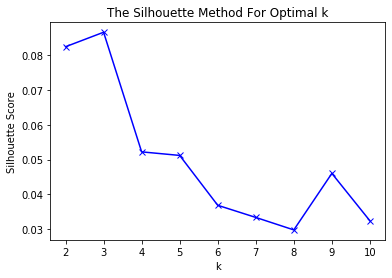

In [40]:
# plotting the silhouette score against number of clusters(k)
# setting up k range from 2 to 10
K = range(2, kmax+1)

plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method For Optimal k')
plt.show()

In [41]:
# Using elbow method to get the optimum number of cluster
Sum_of_squared_distances = [] # create an empty list of Sum of Squared 
K = range(1,15) # setting up the range of K from 1 to 15 as the maximum
for k in K:
    km = KMeans(n_clusters=k) # create a model
    km = km.fit(us_grouped_clustering) # fir the data into the model
    Sum_of_squared_distances.append(km.inertia_)

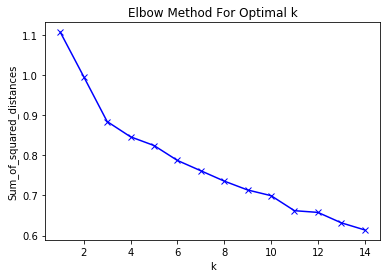

In [42]:
# plot the SSM against number of clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [43]:
#set number of clusters as 3 since it is the optimal number of clusters
kclusters = 3

# run the kmean clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 2).fit(us_grouped_clustering)

# check the clutsering cloumn created for top 10 row
kmeans.labels_[0:10]

array([1, 0, 1, 1, 0, 1, 2, 2, 0, 0], dtype=int32)

In [44]:
# insert the Cluster Labes into citi venues dataframe
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df

# merge df with the cities_venues_sorted
df_merged = df_merged.join(cities_venues_sorted.set_index('Major City in County'), on = 'Major City in County')

df_merged.head(10)

,Destination County,State,Major City in County,All In-migrants From NJ Age 20 or older,Millennial in-migrants from NJ,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York County,NY,Manhattan,19174,12694,66.2,73478,87.74,40.789624,-73.959894,1,Park,Bakery,Theater,Yoga Studio,Concert Hall,Art Museum,Exhibit,Gym,Bookstore,Garden
1,Philadelphia County,PA,Philadelphia,11445,7819,68.3,11787,37.28,39.952724,-75.163526,0,Coffee Shop,Sandwich Place,Italian Restaurant,Steakhouse,Vegetarian / Vegan Restaurant,Hotel,Indian Restaurant,Wine Bar,Plaza,Pizza Place
2,Kings County,NY,Brooklyn,6207,3994,64.3,37940,75.20,40.650104,-73.949582,0,Caribbean Restaurant,Bar,Cocktail Bar,Park,Garden,Café,New American Restaurant,Coffee Shop,Italian Restaurant,Beer Bar
3,Queens County,NY,Queens,6206,3375,54.4,21685,59.77,40.652493,-73.791421,0,Caribbean Restaurant,Airport Lounge,Park,Italian Restaurant,Coffee Shop,Chinese Restaurant,Bakery,Ice Cream Shop,Southern / Soul Food Restaurant,Pizza Place
4,New Castle County,DE,Wilmington,4838,2503,51.7,1313,7.09,39.745947,-75.546589,1,American Restaurant,Coffee Shop,Bar,Seafood Restaurant,Brewery,Italian Restaurant,Park,Café,Breakfast Spot,Sushi Restaurant
5,Montgomery County,PA,Norristown,3412,1752,51.3,1710,8.81,40.121497,-75.339905,2,Pizza Place,Convenience Store,Fast Food Restaurant,American Restaurant,Sandwich Place,Donut Shop,Sushi Restaurant,Coffee Shop,Bar,BBQ Joint
6,Bronx County,NY,Bronx,3435,1742,50.7,34956,70.35,40.850485,-73.840404,2,Pizza Place,Mexican Restaurant,Coffee Shop,Spanish Restaurant,Zoo,Bakery,American Restaurant,Italian Restaurant,Deli / Bodega,Diner
7,Orange County,FL,Orlando,3130,1584,50.6,1493,4.71,28.542110,-81.379039,1,Park,Asian Restaurant,American Restaurant,Coffee Shop,French Restaurant,Bar,Vietnamese Restaurant,Cocktail Bar,Gastropub,Sushi Restaurant
8,Suffolk County,MA,Boston,2056,1449,70.5,13697,49.36,42.360253,-71.058291,1,Park,Bakery,Coffee Shop,Seafood Restaurant,Hotel,Italian Restaurant,Pizza Place,Gym,Historic Site,Sandwich Place
9,District of Columbia,DC,Washington,1513,1281,84.7,11350,57.33,38.895009,-77.036563,1,Monument / Landmark,Hotel,Art Museum,Coffee Shop,History Museum,American Restaurant,Science Museum,Theater,Plaza,Salon / Barbershop


### 5. Mapping Clustered Major Cities into the Map and Explore Each Clusters

In [45]:
# create map
map_clusters = folium.Map(location = [latitude,longitude], zoom_start=4)

#setting the color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Major City in County'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html= True)
    folium.CircleMarker ([lat, lon],
                         radius = 5,
                         popup = label,
                         color = rainbow[cluster - 1],
                         fill = True,
                         fill_color = rainbow[cluster - 1],
                         fill_opacity = 0.7
                        ).add_to(map_clusters)
    
map_clusters

In [46]:
# Explore Cluster 0 
# show only necessary columns
cluster_0 = df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[0] + [5] + [6] + [7] + list(range(10, df_merged.shape[1]))]]
cluster_0

,Destination County,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit",Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Philadelphia County,68.3,11787,37.28,0,Coffee Shop,Sandwich Place,Italian Restaurant,Steakhouse,Vegetarian / Vegan Restaurant,Hotel,Indian Restaurant,Wine Bar,Plaza,Pizza Place
2,Kings County,64.3,37940,75.20,0,Caribbean Restaurant,Bar,Cocktail Bar,Park,Garden,Café,New American Restaurant,Coffee Shop,Italian Restaurant,Beer Bar
3,Queens County,54.4,21685,59.77,0,Caribbean Restaurant,Airport Lounge,Park,Italian Restaurant,Coffee Shop,Chinese Restaurant,Bakery,Ice Cream Shop,Southern / Soul Food Restaurant,Pizza Place
10,Middlesex County,53.8,1960,19.18,0,Pizza Place,Asian Restaurant,Supermarket,American Restaurant,Vietnamese Restaurant,Ice Cream Shop,Coffee Shop,Trail,Breakfast Spot,Park
13,Centre County,92.7,146,17.04,0,American Restaurant,Ice Cream Shop,Coffee Shop,Bar,Salon / Barbershop,Thai Restaurant,Café,Breakfast Spot,Hotel,Pizza Place
16,King County,60.6,1034,20.56,0,Coffee Shop,Hotel,Vietnamese Restaurant,Cocktail Bar,Italian Restaurant,Ice Cream Shop,Sandwich Place,Brewery,French Restaurant,Bakery
18,Providence County,75.4,1556,8.88,0,Café,Bar,Italian Restaurant,New American Restaurant,Coffee Shop,Pizza Place,Restaurant,Seafood Restaurant,American Restaurant,Park
19,New Haven County,55.6,1423,8.75,0,Pizza Place,Coffee Shop,Italian Restaurant,Bar,American Restaurant,Indian Restaurant,Café,Cocktail Bar,Deli / Bodega,Bakery
20,Santa Clara County,64.8,1502,8.38,0,Mexican Restaurant,Coffee Shop,Bar,Sandwich Place,Cocktail Bar,Art Gallery,Pizza Place,Dessert Shop,Theater,Ice Cream Shop
27,Alameda County,49.1,2250,21.19,0,Coffee Shop,Bar,Beer Garden,Brewery,Bakery,Japanese Restaurant,Mexican Restaurant,Ice Cream Shop,American Restaurant,Cocktail Bar


In [47]:
# Explore Cluster 1 
# show only necessary columns
cluster_1 = df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[0] + [5] + [6] + [7] + list(range(10, df_merged.shape[1]))]]
cluster_1

,Destination County,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit",Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York County,66.2,73478,87.74,1,Park,Bakery,Theater,Yoga Studio,Concert Hall,Art Museum,Exhibit,Gym,Bookstore,Garden
4,New Castle County,51.7,1313,7.09,1,American Restaurant,Coffee Shop,Bar,Seafood Restaurant,Brewery,Italian Restaurant,Park,Café,Breakfast Spot,Sushi Restaurant
7,Orange County,50.6,1493,4.71,1,Park,Asian Restaurant,American Restaurant,Coffee Shop,French Restaurant,Bar,Vietnamese Restaurant,Cocktail Bar,Gastropub,Sushi Restaurant
8,Suffolk County,70.5,13697,49.36,1,Park,Bakery,Coffee Shop,Seafood Restaurant,Hotel,Italian Restaurant,Pizza Place,Gym,Historic Site,Sandwich Place
9,District of Columbia,84.7,11350,57.33,1,Monument / Landmark,Hotel,Art Museum,Coffee Shop,History Museum,American Restaurant,Science Museum,Theater,Plaza,Salon / Barbershop
12,Cook County,50.7,5512,25.11,1,Hotel,Park,Theater,Coffee Shop,Grocery Store,Seafood Restaurant,Bar,New American Restaurant,Italian Restaurant,Japanese Restaurant
14,San Diego County,62.6,793,7.09,1,Park,Hotel,New American Restaurant,American Restaurant,Seafood Restaurant,Steakhouse,Sushi Restaurant,Coffee Shop,Taco Place,Italian Restaurant
15,Baltimore city,82.3,7556,26.98,1,Coffee Shop,Aquarium,Italian Restaurant,Deli / Bodega,Bakery,Seafood Restaurant,American Restaurant,Park,Lounge,Hotel
22,Orange County,49.5,4035,5.44,1,Theme Park Ride / Attraction,Theme Park,Theater,Ice Cream Shop,Gift Shop,Burger Joint,Hotel,General Entertainment,Art Gallery,Cajun / Creole Restaurant
26,Fulton County,50.8,1977,11.32,1,American Restaurant,Mexican Restaurant,Trail,History Museum,Park,Pizza Place,Restaurant,Beer Store,Donut Shop,Theater


In [48]:
# Explore Cluster 2 
# show only necessary columns
cluster_2 = df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[0] + [5] + [6] + [7] + list(range(10, df_merged.shape[1]))]]
cluster_2

,Destination County,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit",Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Montgomery County,51.3,1710,8.81,2,Pizza Place,Convenience Store,Fast Food Restaurant,American Restaurant,Sandwich Place,Donut Shop,Sushi Restaurant,Coffee Shop,Bar,BBQ Joint
6,Bronx County,50.7,34956,70.35,2,Pizza Place,Mexican Restaurant,Coffee Shop,Spanish Restaurant,Zoo,Bakery,American Restaurant,Italian Restaurant,Deli / Bodega,Diner
11,Delaware County,53.9,3071,15.17,2,Discount Store,Sandwich Place,Pizza Place,Grocery Store,Convenience Store,Coffee Shop,Pharmacy,Restaurant,Gym / Fitness Center,Bank
17,Lackawanna County,77.3,459,5.35,2,Pizza Place,Bar,Italian Restaurant,Mexican Restaurant,Sandwich Place,Deli / Bodega,Grocery Store,Ice Cream Shop,Donut Shop,Hot Dog Joint
21,Baltimore County,49.7,1391,6.94,2,Bar,Sandwich Place,Seafood Restaurant,Convenience Store,American Restaurant,Park,Italian Restaurant,Pizza Place,Discount Store,Bakery
23,Richmond County,49.2,8242,33.52,2,Pizza Place,Italian Restaurant,Bakery,Furniture / Home Store,Clothing Store,Restaurant,Park,Bagel Shop,Department Store,Dessert Shop
24,Berks County,65.6,488,5.29,2,Bar,American Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Italian Restaurant,Pub,Ice Cream Shop,Farmers Market,Clothing Store
25,Prince George's County,68.2,1890,19.29,2,Sandwich Place,Bank,Mexican Restaurant,Gym,Asian Restaurant,American Restaurant,Pizza Place,Bakery,Ice Cream Shop,Miscellaneous Shop
32,DeKalb County,56.1,2815,10.60,2,Department Store,Pizza Place,American Restaurant,Cosmetics Shop,Bakery,Furniture / Home Store,Burger Joint,Breakfast Spot,Steakhouse,Nail Salon
33,York County,64.5,493,3.02,2,Bar,Pizza Place,Bakery,Sandwich Place,Brewery,Donut Shop,Mexican Restaurant,BBQ Joint,Italian Restaurant,Gym


In [49]:
# create new dataframe with only necessary columns
clusters = df_merged[df_merged.columns[[0] + [5] + [6] + [7] + list(range(10, df_merged.shape[1]))]]
clusters

,Destination County,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit",Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York County,66.2,73478,87.74,1,Park,Bakery,Theater,Yoga Studio,Concert Hall,Art Museum,Exhibit,Gym,Bookstore,Garden
1,Philadelphia County,68.3,11787,37.28,0,Coffee Shop,Sandwich Place,Italian Restaurant,Steakhouse,Vegetarian / Vegan Restaurant,Hotel,Indian Restaurant,Wine Bar,Plaza,Pizza Place
2,Kings County,64.3,37940,75.20,0,Caribbean Restaurant,Bar,Cocktail Bar,Park,Garden,Café,New American Restaurant,Coffee Shop,Italian Restaurant,Beer Bar
3,Queens County,54.4,21685,59.77,0,Caribbean Restaurant,Airport Lounge,Park,Italian Restaurant,Coffee Shop,Chinese Restaurant,Bakery,Ice Cream Shop,Southern / Soul Food Restaurant,Pizza Place
4,New Castle County,51.7,1313,7.09,1,American Restaurant,Coffee Shop,Bar,Seafood Restaurant,Brewery,Italian Restaurant,Park,Café,Breakfast Spot,Sushi Restaurant
5,Montgomery County,51.3,1710,8.81,2,Pizza Place,Convenience Store,Fast Food Restaurant,American Restaurant,Sandwich Place,Donut Shop,Sushi Restaurant,Coffee Shop,Bar,BBQ Joint
6,Bronx County,50.7,34956,70.35,2,Pizza Place,Mexican Restaurant,Coffee Shop,Spanish Restaurant,Zoo,Bakery,American Restaurant,Italian Restaurant,Deli / Bodega,Diner
7,Orange County,50.6,1493,4.71,1,Park,Asian Restaurant,American Restaurant,Coffee Shop,French Restaurant,Bar,Vietnamese Restaurant,Cocktail Bar,Gastropub,Sushi Restaurant
8,Suffolk County,70.5,13697,49.36,1,Park,Bakery,Coffee Shop,Seafood Restaurant,Hotel,Italian Restaurant,Pizza Place,Gym,Historic Site,Sandwich Place
9,District of Columbia,84.7,11350,57.33,1,Monument / Landmark,Hotel,Art Museum,Coffee Shop,History Museum,American Restaurant,Science Museum,Theater,Plaza,Salon / Barbershop


In [50]:
clusters.dtypes # check the type of each columns

Destination County                                    object
Millennials as % of all adult in-migrants from NJ    float64
population density (people per sq. mi., 2017)          int64
% commuting by walking, biking, or public transit    float64
Cluster Labels                                         int32
1st Most Common Venue                                 object
2nd Most Common Venue                                 object
3rd Most Common Venue                                 object
4th Most Common Venue                                 object
5th Most Common Venue                                 object
6th Most Common Venue                                 object
7th Most Common Venue                                 object
8th Most Common Venue                                 object
9th Most Common Venue                                 object
10th Most Common Venue                                object
dtype: object

In [51]:
# for next analysis, we only need 'Destination County', 'Millennials as % of all adult in-migrants from NJ', 'population density (people per sq. mi., 2017)', '% commuting by walking, biking, or public transit' and 'Cluster Labels' columns
# so lets remove all the 10 most common venue columns
clusters = clusters[['Destination County', 'Millennials as % of all adult in-migrants from NJ', 'population density (people per sq. mi., 2017)', '% commuting by walking, biking, or public transit', 'Cluster Labels']]
clusters.head(10)

,Destination County,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit",Cluster Labels
0,New York County,66.2,73478,87.74,1
1,Philadelphia County,68.3,11787,37.28,0
2,Kings County,64.3,37940,75.20,0
3,Queens County,54.4,21685,59.77,0
4,New Castle County,51.7,1313,7.09,1
5,Montgomery County,51.3,1710,8.81,2
6,Bronx County,50.7,34956,70.35,2
7,Orange County,50.6,1493,4.71,1
8,Suffolk County,70.5,13697,49.36,1
9,District of Columbia,84.7,11350,57.33,1


In [52]:
# summarize the mean value of each columns based on the Cluster Labels
clusters.groupby('Cluster Labels').mean()

,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit"
Cluster Labels,,,
0,64.553846,3540.153846,17.145385
1,62.760870,6604.434783,17.816087
2,61.266667,3110.428571,10.728095


### 6. Creating Clusters Based on Other Parameters

In [53]:
# import the necessary libraries
from sklearn.preprocessing import StandardScaler

# create new array of all the parameters
X = clusters.values[:, 1:]

# tranform the parameters into standard scaler
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[ 2.62686049e-01,  6.47661256e+00,  4.08008666e+00,
         8.75041019e-02],
       [ 4.33927065e-01,  6.91076523e-01,  1.23246840e+00,
        -1.13755332e+00],
       [ 1.07753701e-01,  3.14377017e+00,  3.37241458e+00,
        -1.13755332e+00],
       [-6.99525376e-01,  1.61933568e+00,  2.50165061e+00,
        -1.13755332e+00],
       [-9.19692397e-01, -2.91201353e-01, -4.71249299e-01,
         8.75041019e-02],
       [-9.52309733e-01, -2.53969701e-01, -3.74184230e-01,
         1.31256153e+00],
       [-1.00123574e+00,  2.86392320e+00,  3.09871366e+00,
         1.31256153e+00],
       [-1.00939007e+00, -2.74320503e-01, -6.05560267e-01,
         8.75041019e-02],
       [ 6.13322415e-01,  8.70201093e-01,  1.91418121e+00,
         8.75041019e-02],
       [ 1.77123786e+00,  6.50093572e-01,  2.36395366e+00,
         8.75041019e-02],
       [-7.48451381e-01, -2.30524077e-01,  2.11027845e-01,
        -1.13755332e+00],
       [-7.40297046e-01, -1.26331723e-01, -1.52692061e-02,
      

In [54]:
# exploring the optimum number of clusters using silhouette method
sil = [] # create an emty list of silhouette score
kmax = 10 # setting maximum number of clusters as 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

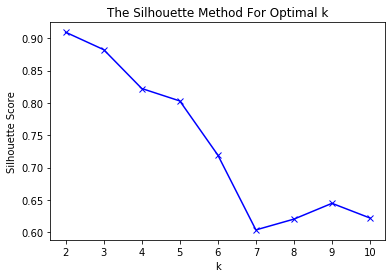

In [55]:
# plot the silhouette score against number of clusters(k)
K = range(2, kmax+1)

plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method For Optimal k')
plt.show()

In [56]:
# explore the optimum number of clusters using elbow method
Sum_of_squared_distances = [] # create an emty list of Sum of Square distance
K = range(1,15) # setting number of clusters from 1 to 15 as the minimum and maximum
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

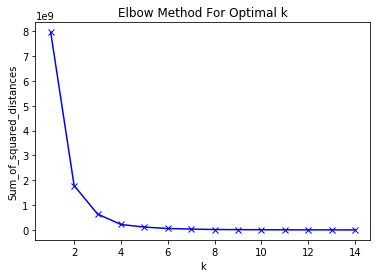

In [57]:
# plot sum Squared Distance score against number of clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [58]:
# the optimum number of clusters is 4
clusterNum = 4
k_means = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12) # create a kmeans model
k_means.fit(X) # fit the data into the kmeans model
labels = k_means.labels_ # predict the cluster for each destination
labels

array([2, 3, 1, 3, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [59]:
# insert the clusters into the clusters dataframe and show the first 5 rows
clusters['Cluster'] = labels
clusters.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Destination County,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit",Cluster Labels,Cluster
0,New York County,66.2,73478,87.74,1,2
1,Philadelphia County,68.3,11787,37.28,0,3
2,Kings County,64.3,37940,75.20,0,1
3,Queens County,54.4,21685,59.77,0,3
4,New Castle County,51.7,1313,7.09,1,0


In [60]:
# summarizing each clusters based on the mean value of each parameters
clusters.drop('Cluster Labels', axis = 1).groupby('Cluster').mean()

,Millennials as % of all adult in-migrants from NJ,"population density (people per sq. mi., 2017)","% commuting by walking, biking, or public transit"
Cluster,,,
0,62.588525,1452.032787,9.562459
1,57.500000,36448.000000,72.775000
2,66.200000,73478.000000,87.740000
3,68.233333,12386.166667,44.040000


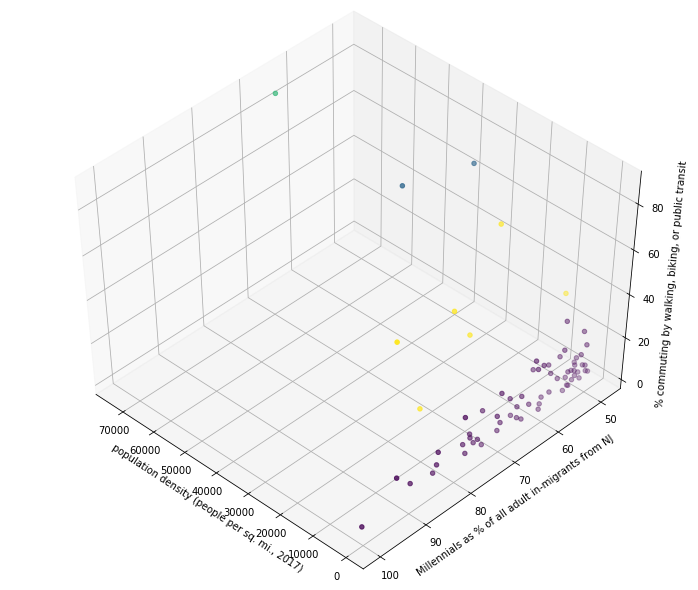

In [64]:
# plotting the clusters using 3D plot
# import the necessary libraries
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize = (10, 8))
plt.clf()
ax = Axes3D(fig, rect = [0, 0, 0.95, 1], elev = 48, azim = 134)

plt.cla()

ax.set_xlabel('population density (people per sq. mi., 2017)')
ax.set_ylabel('Millennials as % of all adult in-migrants from NJ')
ax.set_zlabel('% commuting by walking, biking, or public transit')

ax.scatter(X[:, 1].astype(int), X[:, 0].astype(float), X[:, 2].astype(float), c=labels.astype(np.float))